# TensorFlow Basics

1. It operates over TENSORS (representations of n-dimensional data arrays)
2. It uses a Flow **Graph** that describe mathematical computation with a directed graph of nodes & edges
     * Nodes in the graph represent mathematical operations
     * Edges describe the i/o relationships between nodes
     * Data edges carry dynamically-sized multidimensional data arrays, or tensors
     
3. Nodes are assigned to computational devices and execute asynchronously and in parallel once all the tensors on their incoming edges becomes available


# Core TensorFlow concepts

1. Graph: A TensorFlow computation, represented as a dataflow graph.
2. Operation: a graph node that performs computation on tensors.
3. Tensor: a handle to one of the outputs of an operation.

# Graph Basics
 
1. In TensorFlow the computations are a represented in the form of dataflow graphs. Here, graphs are the descriptions of the computations which will be executed when the graphs are launched in a session. Before this launch they are just a “representation” of how the data will flow and what computations will be performed upon this data.

2. Designing a graph is equivalent to designing a solution to a mathematical or a real world problem. Later, we can feed some input data to these graphs and get the desired output data.

3. Nodes in the graphs are called ops (short for operations). These ops again are just representations of the real computations which would occur when the graphs are launched in a session and some data is provided.

4. Data is represented by tensors. Tensors are the symbolic handle to the inputs and outputs of the ops. The real concrete values are stored in the form numpy arrays. Tensor does not hold the real values but instead provides a means of computing those values in a TensorFlow Session.

# Sample Graph Representation:

<img src="tensors_flowing.gif" style="width:30%;height:30%">

# What are Graphs? Why are they important?

1. Graph is used to represent a complex TensorFlow computation or a model design solution for a problem. This class contains a set of Tensor objects, which represent the units of data that flow between operations and a set of Operation objects, which represent units of computation. These objects are used to design a Graph object.

2. A Graph is a fundamental requirement of executing a TensorFlow computation. Hence, a default Graph is always registered, and accessible by calling **tf.get_default_graph()**. To add an operation to the default graph, we can simply call one of the functions that defines a new Operation and this operation will be added as a unit of this default Graph. Hence, for a particular process all the operations and tensors defined will be added to the default graph unless we create a graph explicitly and add units to it.

## Creating and running your first TensorFlow graph


In [1]:
"""A Simple multiplication problem solved using tensorflow.
Here, Multiplication is added as a node to the default Graph"""
import tensorflow as tf

p = tf.placeholder("float") # Added to the default graph
q = tf.placeholder("float") # Added to the default graph

y = tf.mul(p, q)
sess = tf.Session()
print (sess.run(y, feed_dict={p: 9, q: 9}))
sess.close()

81.0


## Solving a Simple Linear Regression Problem Using TensorFlow graph

1. Here, We generate Ys for random Xs such that y = Wx + b.
2. We know the values of W and b.
3. We will ask TensorFlow to look for the line that best fits the data generated.
4. Hence, TensorFlow would try to find the closest values for W and b using the Xs and Ys.

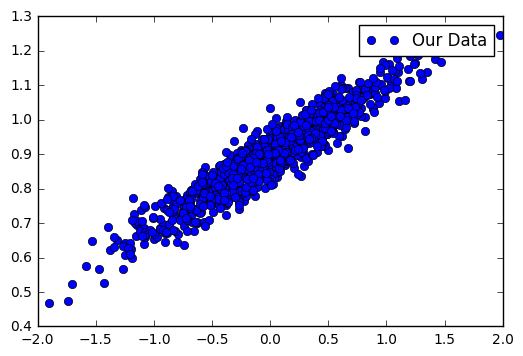

In [2]:
"""Generating Linear data in two Dimensonal Space which will be known to us but not to TensorFlow"""

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

data_size = 1000

W = 0.2
b_approx = 0.9

data = []

mean = 0.0
standard_deviation = .55

for i in range(data_size):
    x1 = np.random.normal(mean, standard_deviation) # most of the random values will be in mean+/-stdvn
    y1 = x1*W + b_approx + np.random.normal(mean, .04)
    data.append([x1,y1])
    
xs = [i[0] for i in data] # Our Xs
ys = [i[1] for i in data] # Our ys

"""Let's See How our Data Looks"""

plt.plot(xs,ys,'bo',label = 'Our Data')
plt.legend()
plt.show()

0 [-0.43218222] [ 0.71393031]


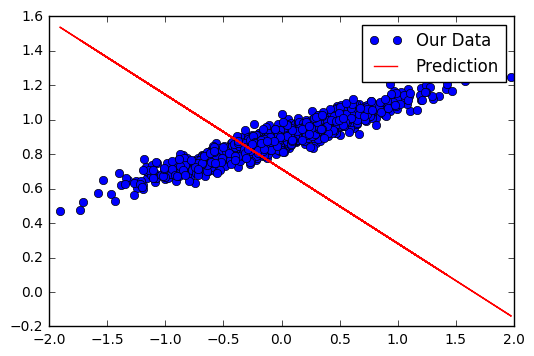

5 [ 0.04498107] [ 0.89700973]


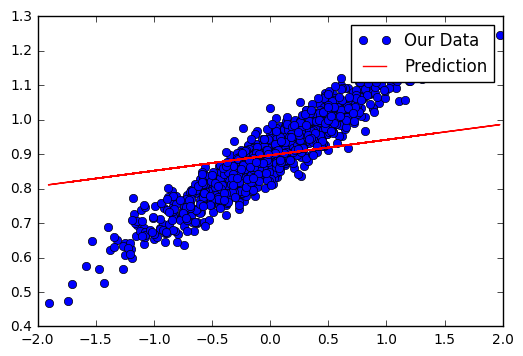

10 [ 0.1647592] [ 0.89838982]


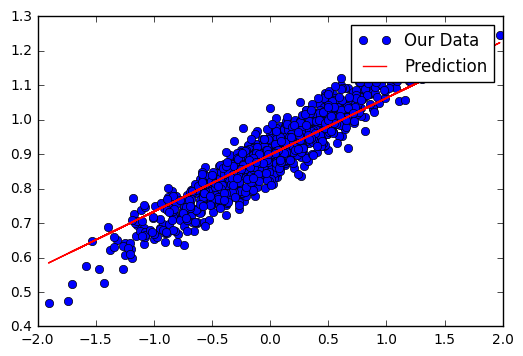

15 [ 0.1947031] [ 0.89872062]


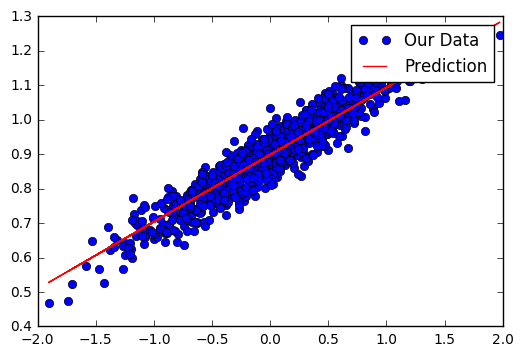

In [3]:
"""We will ask TensorFlow to look for the line that best fits these points!
We know that W should be close to 0.2 and b to 0.9, but TensorFlow does not
Here, Operations and Tensors are added to the Graph g1"""

import tensorflow as tf


g1 = tf.Graph()
with g1.as_default():

    # Start with random values for W and b
    W = tf.Variable(tf.random_uniform([1], -1.5, 1.5), name= 'W')
    b = tf.Variable(tf.zeros([1]), name = 'b')

    # Linear Regression Operation
    y = tf.add(W * xs, b, name = "y")
    

    # We define a Cost Function: Mean Sqaured Error
    loss = tf.reduce_mean(tf.square(y - ys))

    """TensorFlow automatically adds ops to calculate symbolic gradient of variables 
    w.r.t. loss function and apply these gradients with an optimization algorithm"""

    optimizer = tf.train.GradientDescentOptimizer(0.4)
    train = optimizer.minimize(loss)

    init = tf.initialize_all_variables()

with tf.Session(graph=g1) as sess:
    sess.run(init)
    
    for step in range(20):
        sess.run(train)
        if step % 5 == 0:
            print(step, sess.run(W), sess.run(b))
            plt.plot(xs, ys, 'bo', label = 'Our Data')
            plt.plot(xs, sess.run(W) * xs + sess.run(b),'red', label = 'Prediction')
            plt.legend()
            plt.show()
        

    



# TensorFlow Graph of the Linear Regression Model

<img src="lr.png" style="width:50%;height:50%">

# Playing with Graphs


**1. Reseting the Default Graph:** *tf.reset_default_graph()* function can be used to clear all the nodes and ops added to the default graph. The default graph is a property of the current thread. This function applies only to the current thread. We can not use any previously created Operation or Tensor objects after calling this function as they will no longer exist for the current thread. 

Example:


In [4]:
a = tf.constant(1.0)
p = tf.constant(10.0)
c = tf.mul(a, p)
tf.reset_default_graph()
    
    
with tf.Session() as sess:
    try:
        print(sess.run(c)) # Error
    except RuntimeError as e:
        print (e)

The Session graph is empty.  Add operations to the graph before calling run().


**2. Saving and Using Graph Definition:** TensorFlow provides a serialization method to save the graph definiton of a graph and further use of this definition in another Graph. This tool can be used to link multiple graphs.

In [5]:
g2 = tf.Graph()
with g2.as_default():

    p = tf.placeholder(tf.float32, name="value1")
    q = tf.placeholder(tf.float32, name="value2")
    r = tf.mul(p, q)
    product = tf.identity(r, name="product")

g2_def = g2.as_graph_def()


g3 = tf.Graph()

with g3.as_default():
    p = tf.constant(4.0)
    q = tf.constant(5.0)
    product = tf.import_graph_def(g2_def,input_map={"value1:0":p, "value2:0":q},
                                  return_elements=["product:0"])
    
with tf.Session(graph = g3) as sess:          
        print(sess.run(product))



[20.0]


**3. Name Scopes (Data Visualization):** In TensorFlow graph maintains a stack of name scopes. Name Scopes are most important in data visualization. TensorBoard uses name scopes for this purpose. The better your name scopes, the better your visualization.

* A *with name_scope(...)*: statement can be used to push a new name onto the stack for the lifetime of the context.
* The name argument will be interpreted as follows:

A string (not ending with '/') will create a new name scope, in which name is appended to the prefix of all operations created in the context. If name has been used before, it will be made unique by calling self.unique_name(name).

A scope previously captured from a with g.name_scope(...) as scope: statement will be treated as an "absolute" name scope, which makes it possible to re-enter existing scopes.

A value of None or the empty string will reset the current name scope to the top-level (empty) name scope.
For example:

In [6]:
with tf.Graph().as_default() as g:
            a = tf.constant(5.0, name="a")
            print('a: ', a.op.name)
            a = tf.constant(6.0, name="a")
            print('a: ', a.op.name)


                  # Creates a scope called "nested"
            with g.name_scope("layer") as scope:
                    p = tf.constant(10.0, name="p")
                    print ('b: ', p.op.name)

                    # Creates a nested scope called "inner".
                    with g.name_scope("inner_layer"):
                        c = tf.constant(20.0, name="c")
                        print('c: ', c.op.name)

                    # Create a nested scope called "inner_1".
                    with g.name_scope("inner_layer"):
                        c = tf.constant(30.0, name="c")
                        print('c: ', c.op.name)
 
                      # Treats `scope` as an absolute name scope, and
                      # switches to the "nested/" scope.
                    with g.name_scope(scope):
                        d = tf.constant(40.0, name="d")
                        print('d: ', d.op.name)

                        with g.name_scope(""):
                            e = tf.constant(50.0, name="e")
                            print('e: ',e.op.name)

a:  a
a:  a_1
b:  layer/p
c:  layer/inner_layer/c
c:  layer/inner_layer_1/c
d:  layer/d
e:  e


**4. Using Graph Collections for Linear Regression Graph:** Tensorflow is a system for specifying and then executing computational data flow graphs. The graph collections are used as part of keeping track of the constructed graphs and how they must be executed. We can add specific type of values to a given key using *tf.Graph.add_to_collection(name, value)* function. 

For example: all the Variables of a graph 'g1' are stored under the name 'VARIABLES' in the code below.
These names or keys anything. But in general these are standard names. The GraphKeys class contains many standard names for collections.

The standard library uses various well-known names to collect and retrieve values associated with a graph. 

For example, the tf.Optimizer subclasses default to optimizing the variables collected under tf.GraphKeys.TRAINABLE_VARIABLES if none is specified, but it is also possible to pass an explicit list of variables.

The following standard keys are defined:
* VARIABLES: the Variable objects that comprise a model, and must be saved and restored together.

* TRAINABLE_VARIABLES: the subset of Variable objects that will be trained by an optimizer.

* SUMMARIES: the summary Tensor objects that have been created in the graph.

* QUEUE_RUNNERS: the QueueRunner objects that are used to produce input for a computation.

* MOVING_AVERAGE_VARIABLES: the subset of Variable objects that will also keep moving averages.
* REGULARIZATION_LOSSES: regularization losses collected during graph construction.

* WEIGHTS: weights inside neural network layers.

* BIASES: biases inside neural network layers.

* ACTIVATIONS: activations of neural network layers.

These collection of values can later be accessed using *tf.Graph.get_collection(key)* function.


In [7]:
with g1.as_default(): # g1 is the Linear Regression Graph we used previously
    g1.add_to_collection('VARIABLES', W)
    g1.add_to_collection('VARIABLES', b)
    g1.add_to_collection('TRAINABLE_VARIABLES', y)
    
for v in g1.get_collection('VARIABLES'):
    print(v.op.name)
for v in g1.get_collection('TRAINABLE_VARIABLES'):
    print(v.op.name)

W
b
y


**5. Finalizing a Graph:** We can make a Graph read-only by finalizing it.

tf.Graph.finalize() is used for this purpose.

After making a graph read-only, no new operations can be added to it. This is used to ensure that no operations are added to a graph when it is shared between multiple threads, for example when using a QueueRunner.


In [8]:
g1.finalize() # Finalizing the Linear Regression Graph we used previously

with g1.as_default(): 
    
    try:
        s = tf.Variable(2.0, name="value3")
    except RuntimeError as e:
        print(e)
    
    

Graph is finalized and cannot be modified.


**6. Validating an object as an elment of a particular Graph:** TensorFlow provides the function tf.Graph.as_graph_element(obj, allow_tensor=True, allow_operation=True),
which can be used to validate that obj represents an element of a particular graph, and gives an informative error message if it is not.

This function returns the Tensor or Operation in the Graph corresponding to 'obj'.

This function raises the following errors:

TypeError: If obj is not a type we support attempting to convert to types.

ValueError: If obj is of an appropriate type but invalid. For example, an invalid string.

KeyError: If obj is not an object in the graph.

Example:


In [9]:
g4 = tf.Graph()
with g4.as_default():
    p = tf.Variable(1.0, name="value1")
    q = tf.Variable(2.0, name="value2")
    r = tf.mul(p, q)
    product = tf.identity(r, name="product")

k = tf.Variable(3.0,name="keyError")
    
new_p = g4.as_graph_element(p)
print(new_p)    
    
try:    
    new_error_1 = g4.as_graph_element(a_1)
except NameError as e:
    print(e)
    
try:    
    new_error_2 = g4.as_graph_element(a)
except ValueError as e:
    print(e)

try:    
    new_error_2 = g4.as_graph_element("keyError")
except KeyError as e:
    print(e)

Tensor("value1:0", shape=(), dtype=float32_ref)
name 'a_1' is not defined
Tensor Tensor("a_1:0", shape=(), dtype=float32) is not an element of this graph.
"The name 'keyError' refers to an Operation not in the graph."


**7. Control Dependencies:** TensorFlow provides addidng control dependency between two or more ops. If we want one operation to be dependent on another operation we can easily add the dependency to the operations. 

*tf.Graph.control_dependencies(control_inputs)* can be used to return a context manager that specifies control dependencies.

Use with the with keyword to specify that all operations constructed within the context should have control dependencies on control_inputs.

For Example:

In [10]:
tf.reset_default_graph()
a = tf.constant(2.0)
b = tf.constant(10.0)

def execute_op_first(a,b):
        op_first = tf.add(a,b)
        return op_first


op_first = execute_op_first(a,b)
with tf.get_default_graph().control_dependencies([op_first]):
        
        op_second = tf.mul(a, b)
        

        with tf.Session(graph = tf.get_default_graph()) as sess:          
              print(sess.run(op_second))

20.0


**8. Feeding and Fetching:** 

As we know graph is just the representation of the computations. The real values can be feeded into graph and desired output can be fetch from graphs.

Following are few functions related to these operations:


* tf.Graph.is_feedable(tensor):

Used to check if a Tensor is feedable or not.
Returns True if and only if tensor is feedable.

* tf.Graph.is_fetchable(tensor_or_op):

Used to check if a Tensor or an Operation is fetchable or not.
Returns True if and only if tensor_or_op is fetchable.

* tf.Graph.prevent_feeding(tensor):

Used to mark the given tensor as unfeedable in this graph.

* tf.Graph.prevent_fetching(op):

Used to mark the given op as unfetchable in this graph.

In [11]:
"""Using g1:Linear Regression Graph"""

print('Feed Test for W: '+str(g1.is_feedable(W)))
print('Fetch Test for W: '+str(g1.is_fetchable(W)))

g1.prevent_feeding(W)
g1.prevent_fetching(W)

print('Feed Test for W: '+str(g1.is_feedable(W)))
print('Fetch Test for W: '+str(g1.is_fetchable(W)))

Feed Test for W: True
Fetch Test for W: True
Feed Test for W: False
Fetch Test for W: False
